### **Bag of n_grams: Exercise**

- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

- Fake news spreads faster than Real news and creates problems and fear among groups and in society.

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is **Real or Fake Message**.

- You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.


### **About Data: Fake News Detection**

Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


- This data consists of two columns.
        - Text
        - label
- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given Text is Fake or Real.

- As there are only 2 classes, this problem comes under the **Binary Classification.**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import pandas library
df=pd.read_csv("Fake_Real_Data.csv")
df

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [3]:
#print the shape of dataframe
df.shape

(9900, 2)

In [4]:
#print top 5 rows
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [5]:
#check the distribution of labels 
df['label'].value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [6]:
#Add the new column "label_num" which gives a unique number to each of these labels 
df['label_num']=df['label'].apply(lambda x : 1 if x=="fake" else 0)
#check the results with top 5 rows


In [7]:
def fake_real(x):
    import numpy as np
    if x=="Fake":
        return 1
    elif x=="Real":
        return 0
    else :
        return np.nan

In [8]:
df['label_num']=df['label'].apply(fake_real)
df 

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1
1,U.S. conservative leader optimistic of common ...,Real,0
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1
4,Democrats say Trump agrees to work on immigrat...,Real,0
...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,1
9896,Trump consults Republican senators on Fed chie...,Real,0
9897,Trump lawyers say judge lacks jurisdiction for...,Real,0
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,1


### **Modelling without Pre-processing Text data**

In [9]:
#import train-test-split from sklearn 
from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
x=df['Text']
y=df['label_num']
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=2022,stratify=y,test_size=0.2)


In [10]:
#print the shapes of X_train and X_test
print(X_train.shape)


(7920,)


In [11]:
X_test.shape

(1980,)

**Attempt 1** :

1. using sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
- print the classification report.


In [12]:
#1. create a pipeline object
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [13]:
model= Pipeline([
    ("Count_vect",CountVectorizer(ngram_range=(1, 3))),
    ('KNN_clasifier',KNeighborsClassifier(n_neighbors=10,metric="euclidean"))
    ])

In [14]:
#2. fit with X_train and y_train
model.fit(X_train,y_train)

Pipeline(steps=[('Count_vect', CountVectorizer(ngram_range=(1, 3))),
                ('KNN_clasifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

In [37]:
#3. get the predictions for X_test and store it in y_pred
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)

Classification Report

               precision    recall  f1-score   support

           0       0.63      0.99      0.77       980
           1       0.98      0.42      0.59      1000

    accuracy                           0.70      1980
   macro avg       0.80      0.71      0.68      1980
weighted avg       0.80      0.70      0.68      1980


Confusion Matrix
 [[970  10]
 [576 424]]


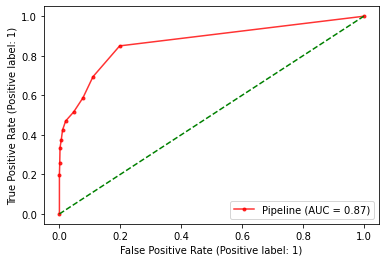

In [39]:
#4. print the classfication report
from sklearn.metrics import classification_report,auc,roc_auc_score,confusion_matrix,accuracy_score

clf=classification_report(y_test,y_pred)
print("Classification Report\n\n",clf)

cfn=confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix\n",cfn)
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, alpha=0.8,marker=".",
                                          color="red",
                                          response_method="auto")
plt.plot([0, 1], [0, 1], color="green", linestyle="--")
plt.show()

<AxesSubplot:>

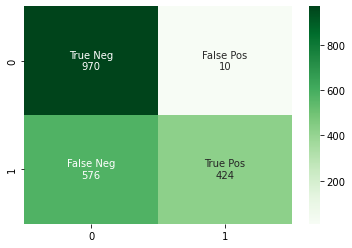

In [32]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cfn.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfn, annot=labels,fmt="", cmap='Greens')


<AxesSubplot:>

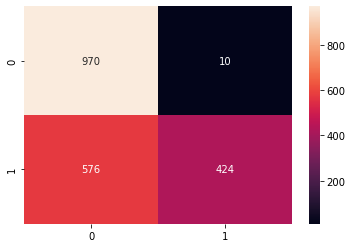

In [33]:
sns.heatmap(cfn,annot=True,fmt='d')

**Attempt 2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use **KNN** as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
- print the classification report.


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score,auc,roc_auc_score,roc_curve,confusion_matrix

Classification Report                precision    recall  f1-score   support

           0       0.65      1.00      0.79       980
           1       1.00      0.47      0.64      1000

    accuracy                           0.73      1980
   macro avg       0.83      0.74      0.72      1980
weighted avg       0.83      0.73      0.71      1980

Confusion Matrix

 [[970  10]
 [576 424]]


<AxesSubplot:>

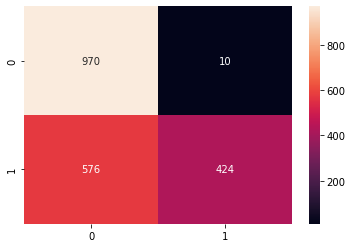

In [44]:
#1. create a pipeline object

model=Pipeline([
    ('count_vec',CountVectorizer(ngram_range=(1,3))),
    ("Knn_cosin",KNeighborsClassifier(n_neighbors=10,metric="cosine"))
])


#2. fit with X_train and y_train
model.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred_cosi=model.predict(X_test)


#4. print the classfication report
from sklearn.metrics import classification_report,accuracy_score,roc_curve,auc,confusion_matrix,roc_curve

clf =classification_report(y_test,y_pred_cosi)
print("Classification Report ",clf)

confussion_mat=confusion_matrix(y_test,y_pred_cosi)
print("Confusion Matrix\n\n",confussion_mat)

sns.heatmap(confussion_mat,annot=True,fmt="d")



**Attempt 3** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score,auc,roc_auc_score,roc_curve,confusion_matrix

Classification Report/n/n                precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.98      0.99      1000

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980

Confusion Matrix

 [[977   3]
 [ 17 983]]


<AxesSubplot:>

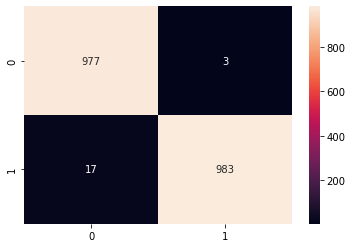

In [54]:
#1. create a pipeline object
model=Pipeline([
    ('count_vec',CountVectorizer(ngram_range=(3,3))),
    ("Random FOrest",RandomForestClassifier())
])

#2. fit with X_train and y_train
model.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred_ranfor=model.predict(X_test)


#4. print the classfication report
from sklearn.metrics import classification_report,accuracy_score,roc_curve,auc,confusion_matrix,roc_curve

clf =classification_report(y_test,y_pred_ranfor)
print("Classification Report/n/n ",clf)

confussion_mat=confusion_matrix(y_test,y_pred_ranfor)
print("Confusion Matrix\n\n",confussion_mat)

sns.heatmap(confussion_mat,annot=True,fmt="d")



In [55]:
print(type(clf))

<class 'str'>


In [56]:
def report_to_df(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

In [57]:
report_to_df(clf)

,Class Name,precision,recall,f1-score,support
0,0,0.98,1.00,0.99,980
1,1,1.00,0.98,0.99,1000



**Attempt 4** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with both unigram and bigrams.
- use **Multinomial Naive Bayes** as the classifier with an alpha value of 0.75.
- print the classification report.


Classification Report                precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.98      1000

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980

Confusion Matrix

 [[967  13]
 [ 20 980]]


<AxesSubplot:>

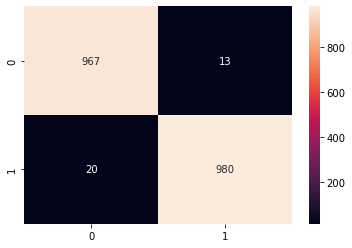

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score,auc,roc_auc_score,roc_curve,confusion_matrix

#1. create a pipeline object
model=Pipeline([
    ('count_vec',CountVectorizer(ngram_range=(1,2))),
    ("Random FOrest",MultinomialNB(alpha=0.75))
])

#2. fit with X_train and y_train
model.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred_nb=model.predict(X_test)


#4. print the classfication report
from sklearn.metrics import classification_report,accuracy_score,roc_curve,auc,confusion_matrix,roc_curve

clf =classification_report(y_test,y_pred_nb)
print("Classification Report ",clf)

confussion_mat=confusion_matrix(y_test,y_pred_nb)
print("Confusion Matrix\n\n",confussion_mat)

sns.heatmap(confussion_mat,annot=True,fmt="d")



<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [58]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [62]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
# this will take some time, please be patient
df["processed_txt"]=df["Text"].apply(preprocess)

In [74]:
df.columns

Index(['Text', 'label', 'label_num', 'processed_txt'], dtype='object')

In [75]:
#print the top 5 rows
df.head()

,Text,label,label_num,processed_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1,Trump Surrogate BRUTALLY stab pathetic video...
1,U.S. conservative leader optimistic of common ...,Real,0,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1,Court Forces Ohio allow Millions illegally p...
4,Democrats say Trump agrees to work on immigrat...,Real,0,democrat trump agree work immigration bill wal...


**Build a model with pre processed text**

In [76]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Make sure to use only the "preprocessed_txt" column for splitting
from sklearn.model_selection import train_test_split

X=df['processed_txt']
y=df['label_num']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2022)

**Let's check the scores with our best model till now**
- Random Forest

**Attempt1** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [70]:
#1. create a pipeline object
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

Classification Report is 

               precision    recall  f1-score   support

           0       0.98      0.92      0.95       980
           1       0.92      0.98      0.95      1000

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980

Confusion Matrix

 [[900  80]
 [ 16 984]]


<AxesSubplot:>

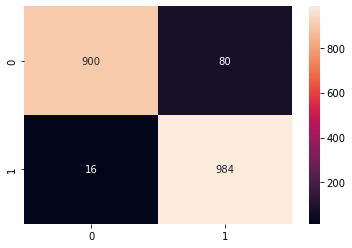

In [77]:
model = make_pipeline(CountVectorizer(ngram_range=(3,3)), RandomForestClassifier())


#2. fit with X_train and y_train
model.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred_prepro_random= model.predict(X_test)


#4. print the classfication report
clf=classification_report(y_test,y_pred_prepro_random)
print('Classification Report is \n\n',clf)

confussion_mat=confusion_matrix(y_test,y_pred_prepro_random)
print("Confusion Matrix\n\n",confussion_mat)

sns.heatmap(confussion_mat,annot=True,fmt="d")

**Attempt2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, Bigram, and trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


Classification Report is 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1000

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980

Confusion Matrix

 [[976   4]
 [  5 995]]


<AxesSubplot:>

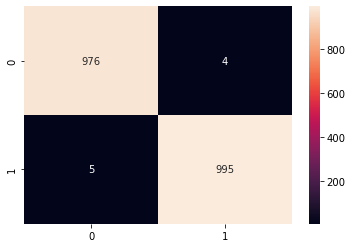

In [78]:
#1. create a pipeline object

model = make_pipeline(CountVectorizer(ngram_range=(1,3)), RandomForestClassifier())


#2. fit with X_train and y_train
model.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred_prepro_random= model.predict(X_test)


#4. print the classfication report
clf=classification_report(y_test,y_pred_prepro_random)
print('Classification Report is \n\n',clf)

confussion_mat=confusion_matrix(y_test,y_pred_prepro_random)
print("Confusion Matrix\n\n",confussion_mat)

sns.heatmap(confussion_mat,annot=True,fmt="d")



In [ ]:
#finally print the confusion matrix for the best model



In [40]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [41]:
!python --version 

Python 3.10.6


In [42]:
!conda env list 

# conda environments:
#
base                     C:\ProgramData\Anaconda3
Neuron                   C:\Users\rajes\.conda\envs\Neuron
Rajesh_3.10              C:\Users\rajes\.conda\envs\Rajesh_3.10
imagescraper             C:\Users\rajes\.conda\envs\imagescraper
mongotest                C:\Users\rajes\.conda\envs\mongotest
new_env                  C:\Users\rajes\.conda\envs\new_env
pycaretenv               C:\Users\rajes\.conda\envs\pycaretenv



## **Please write down Final Observations**


## [**Solution**](./bag_of_n_grams_exercise_solutions.ipynb)